In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# df=pd.DataFrame()

In [11]:
df=pd.read_csv('airline_passengers.csv')
# df.index.freq = 'MS'
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [12]:
df.columns=["Month","Passengers"]
# remove na value from data
df.drop(144,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])
# set index 
df.set_index('Month',inplace=True)
# df.index.freq = 'MS'


In [13]:
## Cleaning up the data
df.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


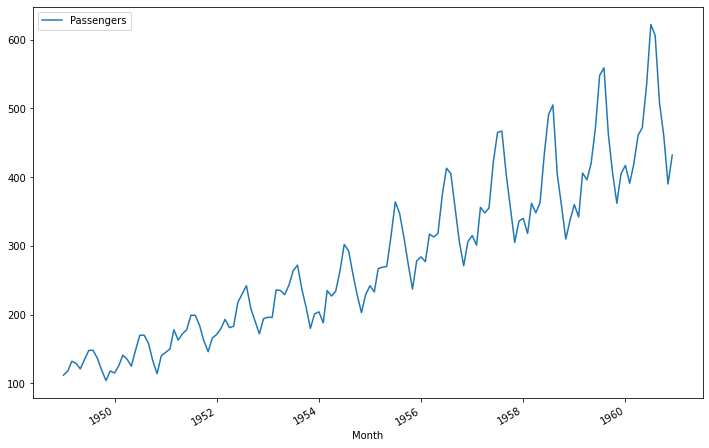

In [14]:
df.columns = ['Passengers']
df.plot(figsize=(12,8))

In [16]:
#As its going to be supervise learning model we have to provide passenger numbers as output where algorith will
# compare inputs(passenger) with last month, 2nd last month,3last month so we will get 
# future output on the basis of previous month values
df['Passengers_LastMonth']=df['Passengers'].shift(+1)
df['Passengers_2Monthsback']=df['Passengers'].shift(+2)
df['Passengers_3Monthsback']=df['Passengers'].shift(+3)
df

,Passengers,Passengers_LastMonth,Passengers_2Monthsback,Passengers_3Monthsback
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,112.0,NaN,NaN
1949-03-01,132.0,118.0,112.0,NaN
1949-04-01,129.0,132.0,118.0,112.0
1949-05-01,121.0,129.0,132.0,118.0
...,...,...,...,...
1960-08-01,606.0,622.0,535.0,472.0
1960-09-01,508.0,606.0,622.0,535.0
1960-10-01,461.0,508.0,606.0,622.0


In [17]:
# remove na values
df=df.dropna()
df

,Passengers,Passengers_LastMonth,Passengers_2Monthsback,Passengers_3Monthsback
Month,,,,
1949-04-01,129.0,132.0,118.0,112.0
1949-05-01,121.0,129.0,132.0,118.0
1949-06-01,135.0,121.0,129.0,132.0
1949-07-01,148.0,135.0,121.0,129.0
1949-08-01,148.0,148.0,135.0,121.0
...,...,...,...,...
1960-08-01,606.0,622.0,535.0,472.0
1960-09-01,508.0,606.0,622.0,535.0
1960-10-01,461.0,508.0,606.0,622.0


In [18]:
# create linear model object
lin_model=LinearRegression()

In [19]:
# random forest
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [22]:
# We have to change output months by comparing the output of predicted value/RSME
x1,x2,x3,y=df['Passengers_LastMonth'],df['Passengers_2Monthsback'],df['Passengers_3Monthsback'],df['Passengers']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[132. 118. 112.]
 [129. 132. 118.]
 [121. 129. 132.]
 [135. 121. 129.]
 [148. 135. 121.]
 [148. 148. 135.]
 [136. 148. 148.]
 [119. 136. 148.]
 [104. 119. 136.]
 [118. 104. 119.]
 [115. 118. 104.]
 [126. 115. 118.]
 [141. 126. 115.]
 [135. 141. 126.]
 [125. 135. 141.]
 [149. 125. 135.]
 [170. 149. 125.]
 [170. 170. 149.]
 [158. 170. 170.]
 [133. 158. 170.]
 [114. 133. 158.]
 [140. 114. 133.]
 [145. 140. 114.]
 [150. 145. 140.]
 [178. 150. 145.]
 [163. 178. 150.]
 [172. 163. 178.]
 [178. 172. 163.]
 [199. 178. 172.]
 [199. 199. 178.]
 [184. 199. 199.]
 [162. 184. 199.]
 [146. 162. 184.]
 [166. 146. 162.]
 [171. 166. 146.]
 [180. 171. 166.]
 [193. 180. 171.]
 [181. 193. 180.]
 [183. 181. 193.]
 [218. 183. 181.]
 [230. 218. 183.]
 [242. 230. 218.]
 [209. 242. 230.]
 [191. 209. 242.]
 [172. 191. 209.]
 [194. 172. 191.]
 [196. 194. 172.]
 [196. 196. 194.]
 [236. 196. 196.]
 [235. 236. 196.]
 [229. 235. 236.]
 [243. 229. 235.]
 [264. 243. 229.]
 [272. 264. 243.]
 [237. 272. 264.]
 [211. 237

In [29]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [30]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

/home/rups/.virtualenvs/jupyiter_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

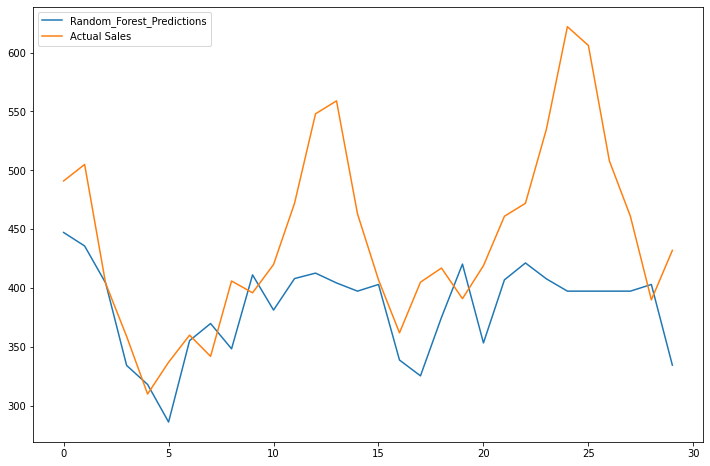

In [31]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

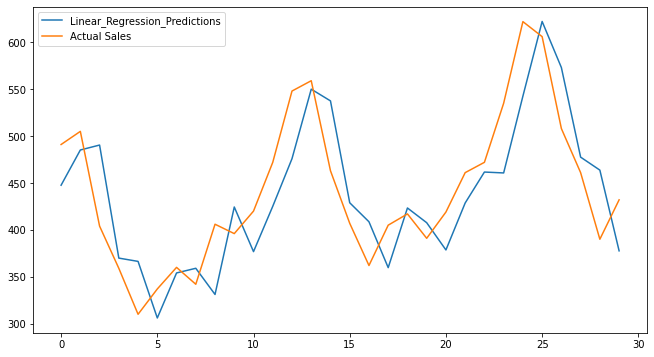

In [32]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [39]:
new_data = df[-30:].copy()

In [43]:
new_data['prediction_value'] = lin_pred
new_data

,Passengers,Passengers_LastMonth,Passengers_2Monthsback,Passengers_3Monthsback,prediction_value
Month,,,,,
1958-07-01,491.0,435.0,363.0,348.0,447.606839
1958-08-01,505.0,491.0,435.0,363.0,485.150123
1958-09-01,404.0,505.0,491.0,435.0,490.416845
1958-10-01,359.0,404.0,505.0,491.0,369.891205
1958-11-01,310.0,359.0,404.0,505.0,366.380208
1958-12-01,337.0,310.0,359.0,404.0,306.059951
1959-01-01,360.0,337.0,310.0,359.0,354.066659
1959-02-01,342.0,360.0,337.0,310.0,359.035068
1959-03-01,406.0,342.0,360.0,337.0,331.127388


In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [34]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 85.98660132059334
Mean Squared Error for Linear Regression Model is: 47.76025639088687
